In [25]:
import warnings
warnings.filterwarnings("ignore")
# Required Packages
import pandas as pd
import numpy as np

# Required for Visualization
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score

In [26]:
#Readin Datasets
dataset=pd.read_csv("Heart_Attack_Analysis_Data.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            303 non-null    int64
 1   Sex            303 non-null    int64
 2   CP_Type        303 non-null    int64
 3   BloodPressure  303 non-null    int64
 4   Cholestrol     303 non-null    int64
 5   BloodSugar     303 non-null    int64
 6   ECG            303 non-null    int64
 7   MaxHeartRate   303 non-null    int64
 8   ExerciseAngia  303 non-null    int64
 9   FamilyHistory  303 non-null    int64
 10  Target         303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


There is no Null data

Finding the outliers

In [27]:
##To Describe more about the data
dataset.describe()

,Age,Sex,CP_Type,BloodPressure,Cholestrol,BloodSugar,ECG,MaxHeartRate,ExerciseAngia,FamilyHistory,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.204620,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.096825,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.000000,1.000000


We could see all the data (Min & Max) are within the limits
All the data types are acceptable

In [28]:
dataset.Age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: Age, dtype: int64

In [29]:
pd.crosstab(dataset.Target, dataset.Sex)

Sex,0,1
Target,,
0,24,114
1,72,93


In [30]:
pd.crosstab(dataset.Target, dataset.CP_Type)

CP_Type,0,1,2,3
Target,,,,
0,104,9,18,7
1,39,41,69,16


In [31]:
pd.crosstab(dataset.Target, dataset.BloodSugar)

BloodSugar,0,1
Target,,
0,116,22
1,142,23


In [32]:
pd.crosstab(dataset.Target, dataset.ECG)

ECG,0,1,2
Target,,,
0,79,56,3
1,68,96,1


In [33]:
pd.crosstab(dataset.Target, dataset.BloodSugar)

BloodSugar,0,1
Target,,
0,116,22
1,142,23


Finding the correlation between the factors

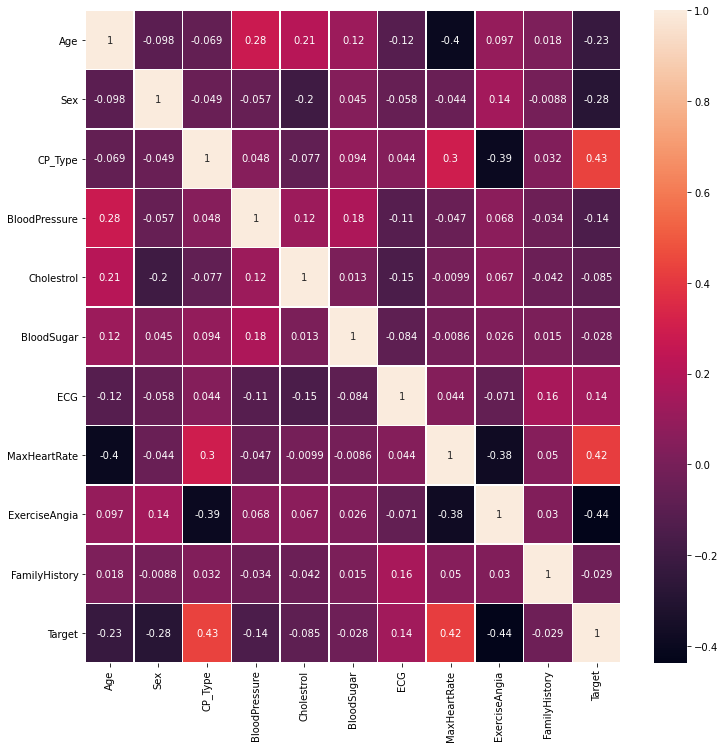

In [34]:
Matrix=dataset.corr()

fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(dataset.corr(), annot = True, linewidths = .5, ax = ax)
plt.show()


To Understand the correlation

In [35]:
print(dataset.corr()["Target"].abs().sort_values(ascending=False))

Target           1.000000
ExerciseAngia    0.436757
CP_Type          0.433798
MaxHeartRate     0.421741
Sex              0.280937
Age              0.225439
BloodPressure    0.144931
ECG              0.137230
Cholestrol       0.085239
FamilyHistory    0.028822
BloodSugar       0.028046
Name: Target, dtype: float64


This shows that most columns are moderately correlated with target, but Family History and Blood sugar is very weakly correlated.

Text(0.5, 1.0, 'Heart Disease in relation with Blood Sugar (Weekly Correlated)')

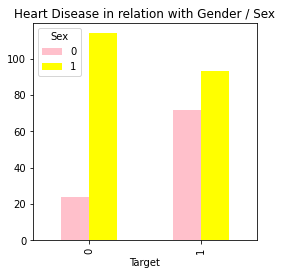

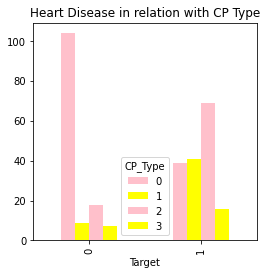

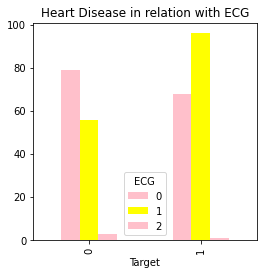

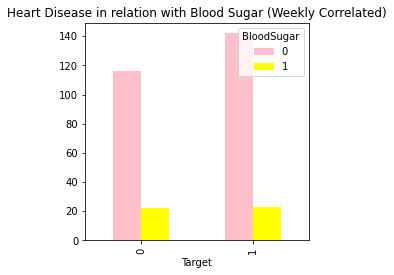

In [36]:
## Bar Chart to show Target vs Sex
pd.crosstab(dataset.Target, dataset.Sex).plot(kind="bar",figsize=(4, 4),color=["pink", "yellow"])
plt.title("Heart Disease in relation with Gender / Sex")
## Bar Chart to show Target vs CP Type
pd.crosstab(dataset.Target, dataset.CP_Type).plot(kind="bar",figsize=(4, 4),color=["pink", "yellow"])
plt.title("Heart Disease in relation with CP Type")
## Bar Chart to show Target vs ECG
pd.crosstab(dataset.Target, dataset.ECG).plot(kind="bar",figsize=(4, 4),color=["pink", "yellow"])
plt.title("Heart Disease in relation with ECG")
## Bar Chart to show Target vs Blood Sugar
pd.crosstab(dataset.Target, dataset.BloodSugar).plot(kind="bar",figsize=(4, 4),color=["pink", "yellow"])
plt.title("Heart Disease in relation with Blood Sugar (Weekly Correlated)")

Splitting the Train test

In [37]:
from sklearn.model_selection import train_test_split
predict = dataset.drop('Target', axis = 1)
target = dataset['Target']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(predict, target, test_size = 0.33, random_state= 100)
from sklearn.preprocessing import StandardScaler

In [39]:
x_train.count()

Age              203
Sex              203
CP_Type          203
BloodPressure    203
Cholestrol       203
BloodSugar       203
ECG              203
MaxHeartRate     203
ExerciseAngia    203
FamilyHistory    203
dtype: int64

In [40]:
x_test.count()

Age              100
Sex              100
CP_Type          100
BloodPressure    100
Cholestrol       100
BloodSugar       100
ECG              100
MaxHeartRate     100
ExerciseAngia    100
FamilyHistory    100
dtype: int64

In [41]:
y_train.shape

(203,)

In [42]:
y_test.shape

(100,)

In [43]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
Logr = LogisticRegression()
Logr.fit(x_train, y_train)
predict_Logr = Logr.predict(x_test)

In [44]:
## Accuracy for Logistic Regression
score_Logr = round(accuracy_score(predict_Logr,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_Logr)+" %")

The accuracy score achieved using Logistic Regression is: 85.0 %


In [45]:
## SVM
from sklearn import svm
sv=svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
predict_svm = sv.predict(x_test)

In [46]:
## Accuracy for SVM
score_sv = round(accuracy_score(predict_svm,y_test)*100,2)
print("The accuracy score achieved using SVM is: "+str(score_sv)+" %")

The accuracy score achieved using SVM is: 88.0 %


In [47]:
## K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
predict_knn = knn.predict(x_test)

In [48]:
## Accuracy for K Nearest Neighbour
score_knn = round(accuracy_score(predict_knn,y_test)*100,2)
print("The accuracy score achieved using K Nearest Neighbour is: "+str(score_knn)+" %")

The accuracy score achieved using K Nearest Neighbour is: 67.0 %


In [49]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

##Finding max accuracy
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    predict_Dt = dt.predict(x_test)
    current_accuracy = round(accuracy_score(predict_Dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

Dt=DecisionTreeClassifier(random_state=best_x)
Dt.fit(x_train, y_train)
predict_Dt= Dt.predict(x_test)

In [50]:
## Accuracy for Decision Tree
score_Dt = round(accuracy_score(predict_Dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_Dt)+" %")

The accuracy score achieved using Decision Tree is: 82.0 %


In [51]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(300):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x_train,y_train)
    predict_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(predict_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf=RandomForestClassifier(random_state=best_x)
rf.fit(x_train, y_train)
predict_rf= rf.predict(x_test)

In [52]:
## Accuracy for Random Forest
score_rf = round(accuracy_score(predict_rf,y_test)*100,2)
print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 88.0 %


Final Output

In [53]:
scores = [score_Logr,score_sv,score_knn,score_Dt,score_rf]
Pred_Model = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(Pred_Model)):
    print("The accuracy score achieved using "+Pred_Model[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.0 %
The accuracy score achieved using Support Vector Machine is: 88.0 %
The accuracy score achieved using K-Nearest Neighbors is: 67.0 %
The accuracy score achieved using Decision Tree is: 82.0 %
The accuracy score achieved using Random Forest is: 88.0 %


<AxesSubplot:xlabel='Predictive Model', ylabel='Accuracy score'>

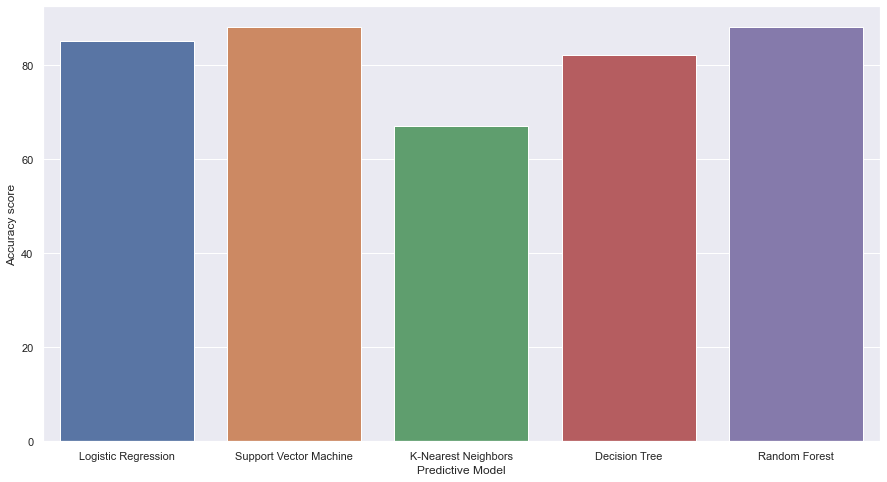

In [54]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Predictive Model")
plt.ylabel("Accuracy score")

sns.barplot(Pred_Model,scores)